In [47]:
import numpy as np
from becquerel import rebin, Spectrum
import matplotlib.pyplot as plt
from becquerel import SpectrumPlotter as sp
%matplotlib inline

def plot_rebin(bins, edges, lim=None):
    for b, e in zip(bins, edges):
        plt.plot(*sp.bin_edges_and_heights_to_steps(e, b))
        plt.fill_between(*sp.bin_edges_and_heights_to_steps(e, b), alpha=0.5)
    if lim:
        plt.gca().set_ylim(lim)

def plot_rebin_spec(specs, lim=None):
    fig, ax = plt.subplots()
    for s in specs:
        s.plot(ax=ax)
        s.fill_between(ax=ax, alpha=0.5)
    if lim:
        ax.set_ylim(lim)

## Rebinning module

Rebin can take in numpy arrays (both 1D and 2D, with the shape (number of spectra, number of bins) directly:

In [52]:
in_bins_1d = np.array([1,2,2,3,1,0])
in_edges = np.array([0,2,4,6,8,10,12])
out_edges = np.array([0,1,3,6,7,9])  # The edges does not have to be equally spaced

### Rebinning methods

there are two rebinning methods, `interpolation` and `listmode`  
- `interpolation`: assuming that the distribution within each bin is flat (or as specified in the `slopes` argument), put the proportion of counts into each of the corresponding new bins. Counts may become fractional after the rebinning, and this does not preserve Poisson statistics. (TODO: add how the `slopes` argument works)
- `listmode`: carries out a stochastic rebinning, by randomly sampling energies within each bin and binning all these energies into the new bin structure

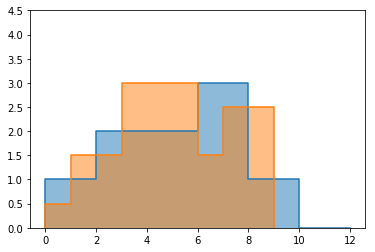

In [53]:
out_bins_1d = rebin(in_bins_1d, in_edges, out_edges, method='interpolation', slopes=None)
plot_rebin([in_bins_1d, out_bins_1d], [in_edges, out_edges], lim=(0,4.5))

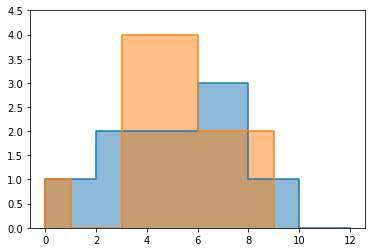

In [54]:
out_bins_1d = rebin(in_bins_1d, in_edges, out_edges, method='listmode', slopes=None)
plot_rebin([in_bins_1d, out_bins_1d], [in_edges, out_edges], lim=(0,4.5))

### 2D Rebinning
You can rebin multiple spectra at the same time, too. The example uses the same input bin edges as the 1D example.

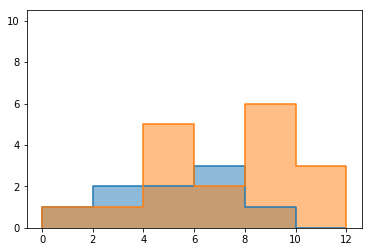

In [55]:
in_bins_2d = np.array([[1,2,2,3,1,0], [1,1,5,2,6,3]])
plot_rebin(in_bins_2d, [in_edges]*2, lim=(0,10.5))

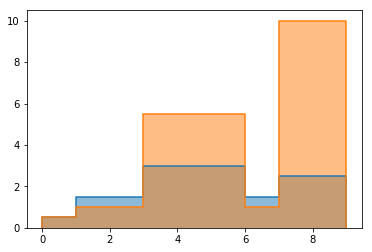

In [56]:
out_bins_2d = rebin(in_bins_2d, in_edges, out_edges, method='interpolation', slopes=None)
plot_rebin(out_bins_2d, [out_edges]*2, lim=(0,10.5))

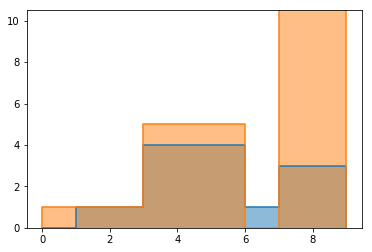

In [57]:
out_bins_2d = rebin(in_bins_2d, in_edges, out_edges, method='listmode', slopes=None)
plot_rebin(out_bins_2d, [out_edges]*2, lim=(0,10.5))

## Spectrum rebinning

It is possible to directly rebin a spectrum object

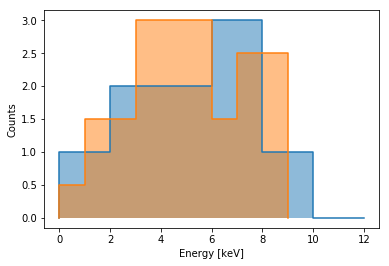

In [58]:
in_spec = Spectrum(in_bins_1d, bin_edges_kev=in_edges)
out_spec = in_spec.rebin(out_edges)
plot_rebin_spec([in_spec, out_spec])

There is also a `rebin_like` method, that takes another spectrum as argument and rebins according to that spectrum.

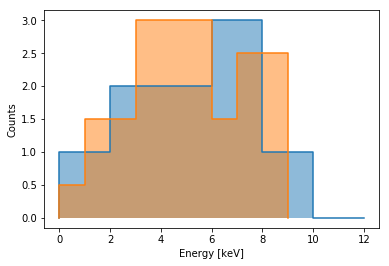

In [59]:
out_spec_like = in_spec.rebin_like(out_spec)
plot_rebin_spec([in_spec, out_spec])